In [1]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [2]:
boston = datasets.load_boston()
X = boston.data[:150]
y = boston.target[:150]
X = X[y < np.max(y)]
y = y[y < np.max(y)] # 剔除异常值(上限点)
X = X[:, 5].reshape(-1, 1) # 2维矩阵

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [5]:
dt_reg.score(X_test, y_test) # ★★★★★决策树容易发生过拟合

0.34126131999629195

In [6]:
dt_reg.score(X_train, y_train)

0.9901041338148672

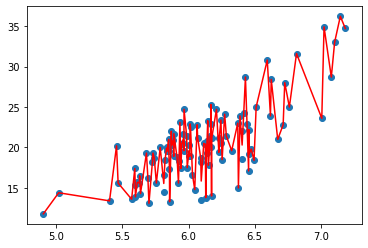

In [7]:
train_predict = dt_reg.predict(X_train) # train_predict:1维向量
plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train, axis=0), 
         train_predict[np.argsort(X_train, axis=0)], color='red') # 分段直线函数

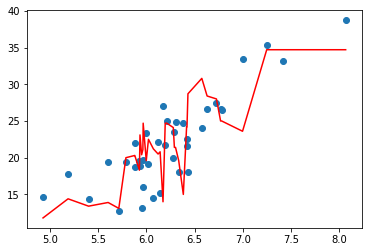

In [8]:
test_predict = dt_reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(np.sort(X_test, axis=0), 
         test_predict[np.argsort(X_test, axis=0)], color='red')

In [9]:
param_grid = [
    {   'criterion': ['mse', 'mae'], # The function to measure the quality of a split(mse:均方误差, mae:绝对误差)
        'max_depth': [i for i in range(1, 10)],
        'min_samples_split': [i for i in range(2, 10)],
        'min_samples_leaf': [i for i in range(1, 10)],
        'max_leaf_nodes': [i for i in range(2, 10)]
    }
]

In [10]:
grid_search = GridSearchCV(dt_reg, # 训练器对象
                           param_grid, # 字典或字典列表(需要优化超参数的取值)
                           cv=5, # 使用几折交叉验证
                           n_jobs=-1,  # 进行训练的CPU核心个数,默认n_jobs=1(n_jobs=-1:使用所有CPU核心进行训练)
                           scoring=None)  # 默认为None,使用训练器的score方法
grid_search.fit(X_train, y_train)

D:\CodeProgram\anconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'criterion': ['mse', 'mae'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                     

In [11]:
good_dt_reg = grid_search.best_estimator_ # 返回最优的训练器
good_dt_reg

DecisionTreeRegressor(criterion='mae', max_depth=3, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [12]:
grid_search.best_score_ # 输出最优训练器的score

0.4944383961324452

In [13]:
grid_search.best_params_ # 返回最优化的超参数组合

{'criterion': 'mae',
 'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [14]:
good_dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=3, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

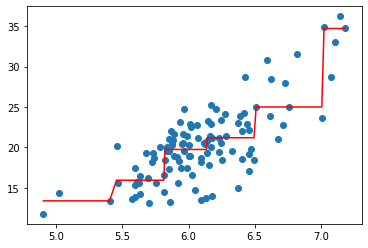

In [15]:
train_predict1 = good_dt_reg.predict(X_train) # train_predict1:1维向量
plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train, axis=0), train_predict1[np.argsort(X_train, axis=0)], color='red')

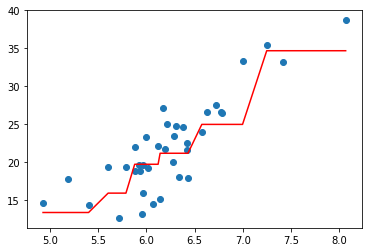

In [16]:
test_predict1 = good_dt_reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(np.sort(X_test, axis=0), 
         test_predict1[np.argsort(X_test, axis=0)], color='red') # 过拟合程度有所降低(分段函数)

In [17]:
lin_reg = LinearRegression() # 多元线性回归
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lin_reg.score(X_test, y_test) # 这里LineraRegreesion拟合效果比DecisionTreeRegressor效果好

0.7141439166449658

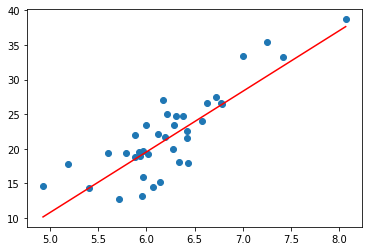

In [19]:
test_predict_lin = lin_reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(np.sort(X_test, axis=0), 
         test_predict_lin[np.argsort(X_test, axis=0)], color='red') # 直线拟合